In [2]:
import numpy as np
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Infector data is stored in a CSV produced from aggregated data contained within a local postgres table. CSV is imported into a dataframe:

In [8]:
infectors = pd.read_csv('infector_info.csv')
infectors.drop('infector_id',axis=1,inplace=True)
infectors.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset,confirmed_date,released_date,deceased_date,self_state,no_infected
0,6100000103,female,30s,Korea,Gyeongsangnam-do,Jinju-si,etc,6.100000e+09,NaN,2020-03-30,2020-03-31,NaN,NaN,released,1
1,4100000022,female,30s,Korea,Chungcheongnam-do,Cheonan-si,gym facility in Cheonan,4.100000e+09,5.0,2020-02-22,2020-02-28,2020-03-06,NaN,released,4
2,2000000512,male,50s,Korea,Gyeonggi-do,Uijeongbu-si,contact with patient,NaN,NaN,NaN,2020-04-01,NaN,NaN,isolated,1
3,1000000306,male,20s,Korea,Seoul,Eunpyeong-gu,overseas inflow,NaN,NaN,NaN,2020-03-20,NaN,NaN,released,2
4,1000000887,NaN,NaN,Korea,Seoul,Guro-gu,Richway,NaN,NaN,2020-05-31,2020-06-02,NaN,NaN,released,4


This dataframe contains inforamtion about South Korean covid patients who are known to have infected at least one other person. Where the no_infected column indicates the number of subsequent cases linked to this individual.

In [10]:
sns.set_style('darkgrid')

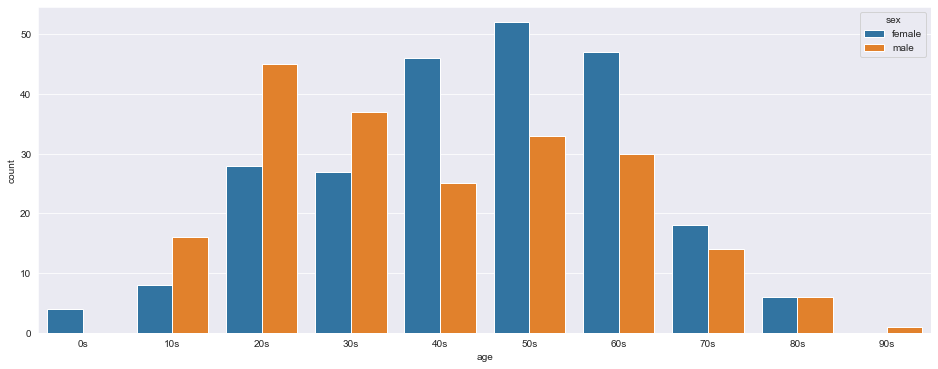

In [24]:
plt.figure(figsize=(16, 6))
sns.countplot(data=infectors,x='age',hue='sex',
order=['0s','10s','20s','30s','40s','50s','60s','70s','80s','90s'])

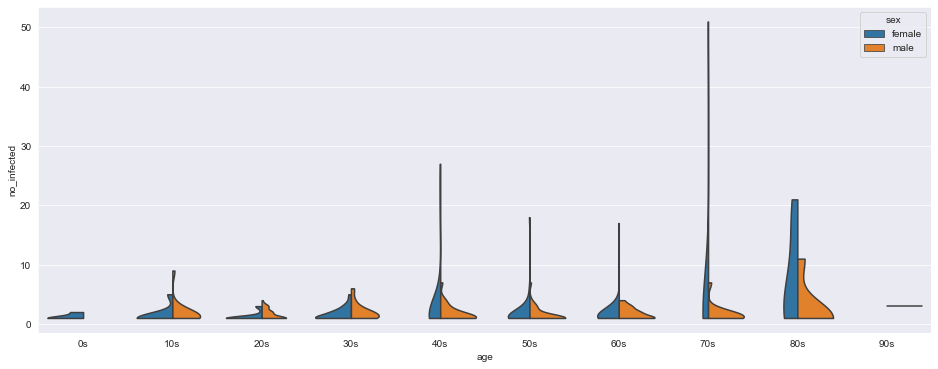

In [22]:
plt.figure(figsize=(16, 6))
sns.violinplot(data=infectors,x='age',y='no_infected',hue='sex',split=True, inner=None,
order=['0s','10s','20s','30s','40s','50s','60s','70s','80s','90s'],cut=0)

Since there are correlations with both age and sex we can use scikit learn to attempt to fit a logistic regression model to the data.

In [31]:
train = pd.DataFrame(infectors[['patient_id','sex','age','no_infected']])
train.dropna(inplace=True)

In [32]:
sex = pd.get_dummies(train['sex'],drop_first=True)
age = pd.get_dummies(train['age'],drop_first=True)

In [33]:
train.drop(['sex','age'],axis=1,inplace=True)
train = pd.concat([train,sex,age],axis=1)

train_test_split from scikit learn is used to create training and testing datasets that are used to fit the optimal model parameters, where the target column is no_infected.

In [34]:
from sklearn.model_selection import train_test_split
X = train.drop(['patient_id','no_infected'],axis=1)
Y = train['no_infected']

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.4)

The logistic regression model from scikit learn is used for fitting since we are dealing with categorised columns.

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [37]:
predictions = model.predict(X_test)

The classification report from scikit learn provides metrics to evaluate the performance of the model.

In [38]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           1       0.61      1.00      0.76       108
           2       0.00      0.00      0.00        38
           3       0.00      0.00      0.00        16
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         1
          51       0.00      0.00      0.00         1

    accuracy                           0.61       178
   macro avg       0.04   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
